https://www.kaggle.com/code/stephen924/stochastic-processes-and-applications

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rm
from scipy.stats import norm
import itertools
import matplotlib.patches as mpatches

In [2]:
%matplotlib inline

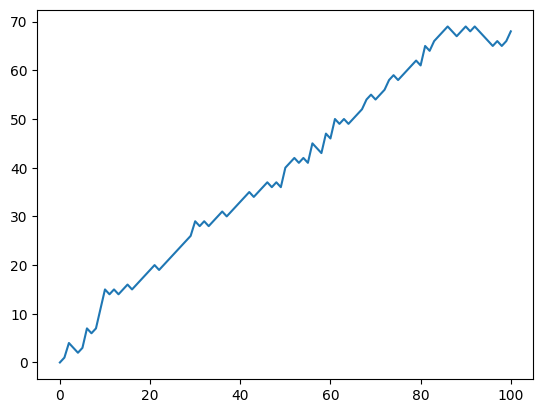

In [3]:
# Initialization
np.random.seed(99)

# Initialize all_walks
all_walks = []

# Simulate random walk 10 times
for i in range(10) :

    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = step - 1
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,5)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)


#print(all_walks)

# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.show()

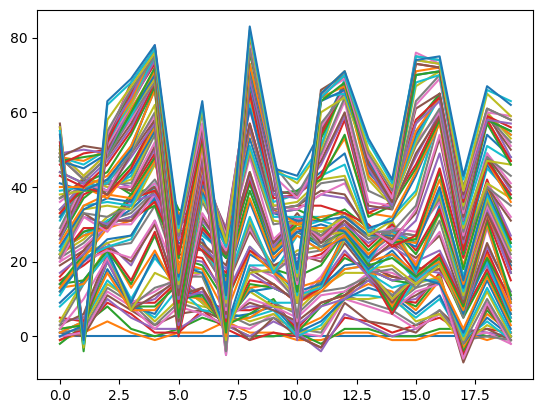

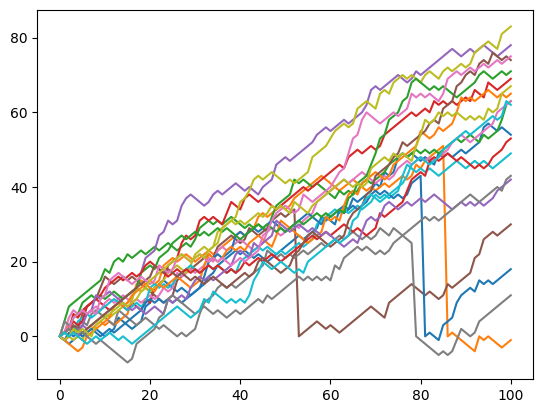

In [4]:
np.random.seed(99)
all_walks = []
for i in range(20) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = step - 1
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,5)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)

# Plot np_aw and show
plt.plot(np_aw)
plt.show()

# Clear the figure
plt.clf()

# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

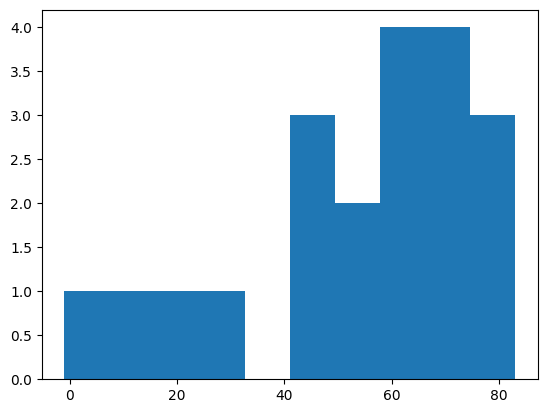

The odds of the ending point being above 40 is 3.20%


In [6]:
# Select last row from np_aw_t: ends
ends = np_aw_t[-1]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

#lets caclulate the odds of the ending point being above 40
bool = ends >= 40
greater = sum(bool)
print("The odds of the ending point being above 40 is " + "{:0.2%}".format(greater / 500))

# Brownian Motion

In [8]:
# Brownian Motion steps
for i in range(0, 50):
    xt = 0 + norm.rvs(scale=1**2* 4)
    #print(xt)

In [9]:
def generate_brownian(x0, n, dt, delta, output=None):
    x0 = np.asarray(x0)
    r = norm.rvs(size=x0.shape + (n,), scale=delta* np.sqrt(dt))
    if output is None:
        output = np.empty(r.shape) 
        
    np.cumsum(r, axis=-1, out = output)
    output += np.expand_dims(x0, axis=-1)

    return output

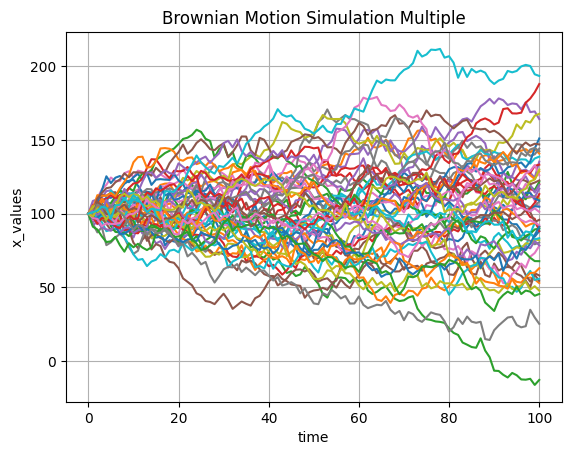

In [10]:
x = np.empty((50,101))
x[:, 0] = 100

generate_brownian(x[:, 0], 100, 1, 4, output=x[:,1:])

time = np.linspace(0, 100, 101)
for k in range(50):
    plt.plot(time, x[k])
plt.title('Brownian Motion Simulation Multiple')
plt.xlabel('time')
plt.ylabel('x_values')
plt.grid(True)
plt.show()

# Poisson Process

In [11]:
def poisson_process(lambdas, number):
    X_T = np.random.poisson(lambdas, size=number)
    S = [np.sum(X_T[0:i]) for i in range(number)]
    X = np.linspace(0, number, number)
    graphs = [plt.step(X, S, label="Lambda = %d"%lambdas)[0] for i in range(lambdas)]
    graph = plt.step(X, S, label="Lambda = %d"%lambdas)
    plt.legend(handles=graph, loc=2)
    plt.title('Poisson Process')
    plt.xlabel('time')
    plt.ylabel('intensity')

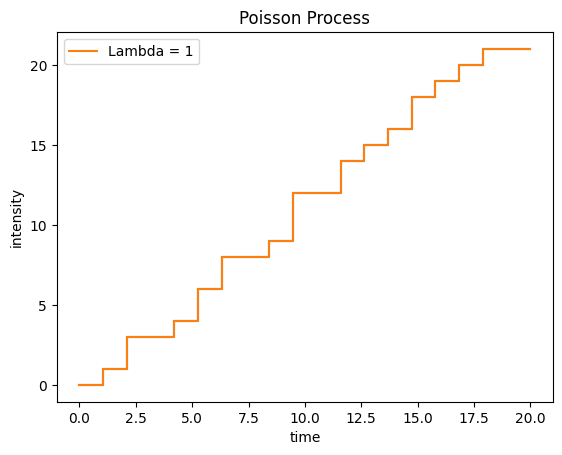

In [12]:
poisson_process(1, 20)
plt.show()

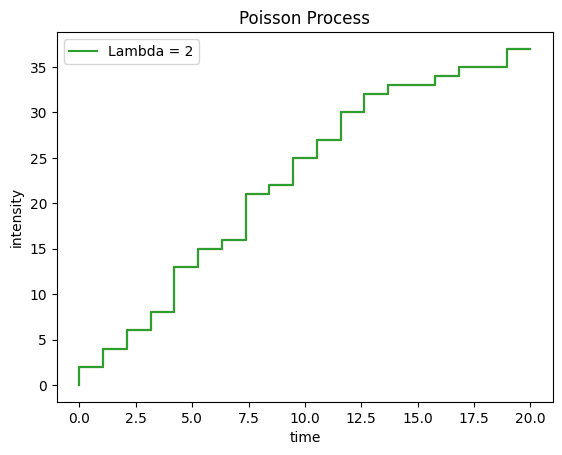

In [13]:
poisson_process(2, 20)
plt.show()

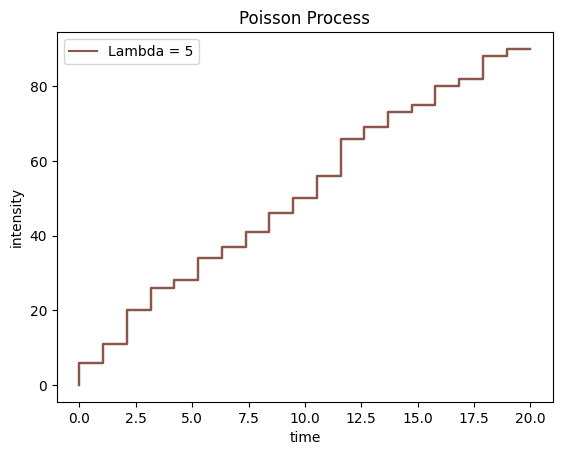

In [14]:
poisson_process(5, 20)
plt.show()

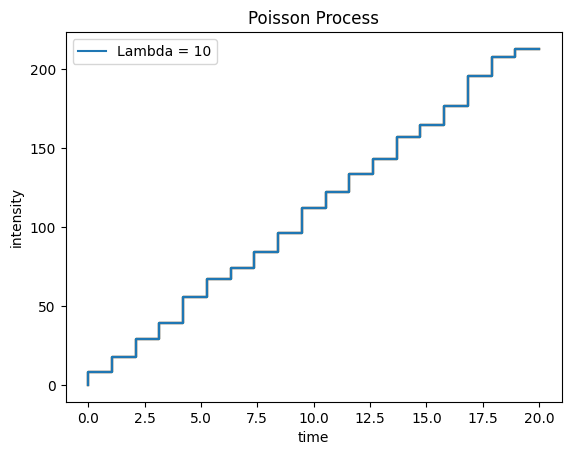

In [15]:
poisson_process(10, 20)
plt.show()

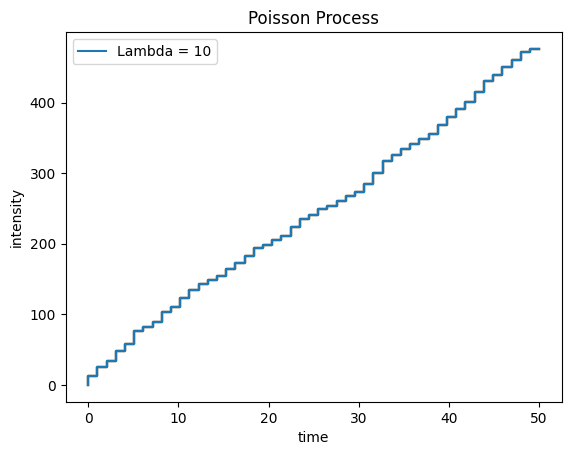

In [16]:
poisson_process(10, 50)
plt.show()

# Markov Chains

In [17]:
# Different States
states = ["Rise","Fall","Static"]

# Possible sequences of events
transitionName = [["SS","SR","SF"],["RR","RS","RF"],["FR","FS","FF"]]

# Transition matrix
transitionMatrix = [[0.2,0.6,0.2],[0.15,0.5,0.35],[0.05,0.55,0.4]]

In [18]:
if (sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[2])) != 3:
    print("Error! The probablilities for every position must be 1")

In [19]:
def activity_forecast(hours):
    # Lets start with Static State
    activityNow = "Static"
    print("Start state: " + activityNow)
    activityList = [activityNow]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != hours:
        if activityNow == "Static":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Static")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityNow = "Rise"
                activityList.append("Rise")
            else:
                prob = prob * 0.2
                activityNow = "Fall"
                activityList.append("Fall")
        elif activityNow == "Rise":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.15
                activityList.append("Rise")
                pass
            elif change == "RS":
                prob = prob * 0.5
                activityNow = "Static"
                activityList.append("Static")
            else:
                prob = prob * 0.35
                activityNow = "Fall"
                activityList.append("Fall")
                "FR","FS","FR"
        elif activityNow == "Fall":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "FR":
                prob = prob * 0.05
                activityNow = "Static"
                activityList.append("Rise")
                pass
            elif change == "FS":
                prob = prob * 0.55
                activityNow = "Static"
                activityList.append("Static")
            else:
                prob = prob * 0.4
                activityNow = "Fall"
                activityList.append("Fall")
        i += 1  
    print("Possible states: " + str(activityList))
    print("End state after "+ str(hours) + " hours: " + activityNow)
    print("Probability of the possible sequence of states: " + str(prob))

#Forcast for the next 5 hours
activity_forecast(5)

Start state: Static
Possible states: ['Static', 'Rise', 'Fall', 'Static', 'Rise', 'Static']
End state after 5 hours: Static
Probability of the possible sequence of states: 0.03465


In [20]:
def activity_forecast(hours):
    activityNow = "Static"
    activityList = [activityNow]
    i = 0
    prob = 1
    while i != hours:
        if activityNow == "Static":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Static")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityNow = "Rise"
                activityList.append("Rise")
            else:
                prob = prob * 0.2
                activityNow = "Fall"
                activityList.append("Fall")
        elif activityNow == "Rise":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.15
                activityList.append("Rise")
                pass
            elif change == "RS":
                prob = prob * 0.5
                activityNow = "Static"
                activityList.append("Static")
            else:
                prob = prob * 0.35
                activityNow = "Fall"
                activityList.append("Fall")
                "FR","FS","FR"
        elif activityNow == "Fall":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "FR":
                prob = prob * 0.05
                activityNow = "Static"
                activityList.append("Rise")
                pass
            elif change == "FS":
                prob = prob * 0.55
                activityNow = "Static"
                activityList.append("Static")
            else:
                prob = prob * 0.4
                activityNow = "Fall"
                activityList.append("Fall")
        i += 1    
    return activityList

list_activity = []
count = 0

for iterations in range(1,10000):
        list_activity.append(activity_forecast(2))
  
print(list_activity[0:5])
#we can view the first 5 outputs

[['Static', 'Rise', 'Fall'], ['Static', 'Rise', 'Static'], ['Static', 'Rise', 'Static'], ['Static', 'Fall', 'Static'], ['Static', 'Rise', 'Static']]


In [21]:
for smaller_list in list_activity:
    if(smaller_list[2] == "Rise"):
        count += 1
        
#what is the probability of starting with static and ending with Rise.
percentage = (count/10000) * 100
print("The probability of starting at state:'Static' and ending at state:'Rise'= " + str(percentage) + "%")

The probability of starting at state:'Static' and ending at state:'Rise'= 21.25%


In [22]:
for smaller_list in list_activity:
    if(smaller_list[2] == "Fall"):
        count += 1
        
#what is the probability of starting with static and ending with Fall.
percentage = (count/10000) * 100
print("The probability of starting at state:'Static' and ending at state:'Fall'= " + str(percentage) + "%")

The probability of starting at state:'Static' and ending at state:'Fall'= 55.25%


In [23]:
for smaller_list in list_activity:
    if(smaller_list[2] == "Static"):
        count += 1
        
#what is the probability of starting with static and ending with Static.
percentage = (count/10000) * 100
print("The probability of starting at state:'Static' and ending at state:'Static'= " + str(percentage) + "%")
#There is an error it should be 1 - percentage_for_fall - percentage_for_rise

The probability of starting at state:'Static' and ending at state:'Static'= 99.99%
